### Setup Functions


#### Mount Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


#### Display Image in Python Notebook

In [0]:
import cv2
from google.colab.patches import cv2_imshow

def displayImage(imageName, size=(1.0, 1.0)):
  image = cv2.imread(r'/content/gdrive/My Drive/HW4 Images/' + imageName)
  image_size = image.shape
  image = cv2.resize(image, dsize=(0, 0), fx=size[0], fy=size[1])
  cv2_imshow(image)

# Homework 4

## General Concepts

AI is a branch of computer science that attempts to mimic intelligent behavior and solve problems that typically require human intelligence. Visual perception, speech recognition, decision-making, and translation between languages, are some examples of tasks that would normally require human intelligence and are attempting to be solved through AI today.

The first attempt at AI relied on Symbolic AI. In this category of AI, a network takes in the input and rules of a problem, and attempts to spit out an output.

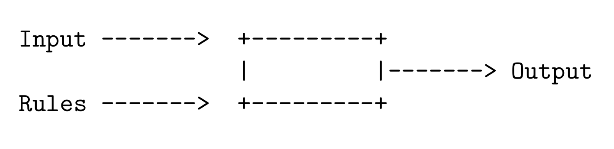

In [0]:
displayImage('SymbolicAI.png')

Machine Learning is the newer sub-field of AI, and its architecture takes in the inputs and outputs of a problem and attempts to spit out the rules that produce the outputs given the inputs.

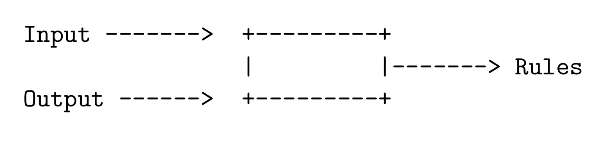

In [0]:
displayImage('MachineLearning.png')

In this architecture, a **label** is the output we are trying to predict, and the **features** are the inputs to the network. These features and their corresponding labels are split into a training and validation set.

The training set is what the neural network is actually trained on, while validation is set aside to test how well the network works on data it has never seen before.

In a basic perceptron learning model, all of the inputs form a weighted sum that is passed to an output node. This output node then uses a non-linear activation function such as sigmoid to produce the final output for the network on the given inputs.

The weights associated with each of the inputs are "learned" via gradient descent such that the model will become more and more accurate on the dataset.

In deep learning, this idea is extended such that the inputs are passed as weighted sums to a hidden layer, which is passed as weighted sum to another hidden layer, ..., until you finally pass it to a final output layer depending on how many hidden layers you'd like in your network.

Weights are updated by backpropagation of gradient descent. The rate of change of a loss function, such as Mean Squared Error, is used in determining how much each weight gets changed on each pass.

## Building a Model (CNN)

Convolutional Neural Networks are used typically in image datasets to reduce the number of parameters a neural network has to learn while still maintaining a good representation of the data.

The typical structure can be boiled down to a series of convolutions and maxpooling layers, followed by a flattening operation, and then being passed to a standard Feed-Forward Neural Network.

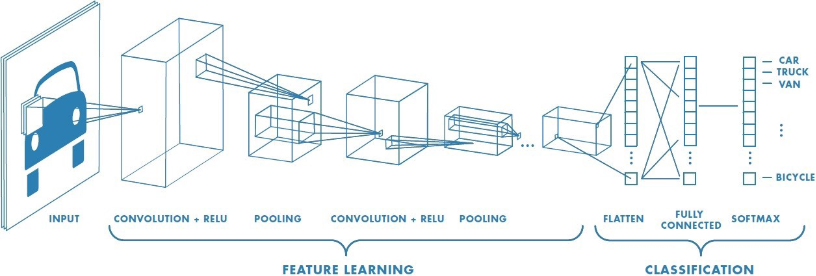

In [0]:
displayImage('CNN.jpeg', (0.65, 0.65))

A convolution layer is composed of multiple learnable filters convolved with the input image. The filters are a *M*x*N* sized block, where *M* and *N* are an arbitrary chosen size, which is convolved in a scanning operation along the whole input image.

The scanning operation works by performing a dot product of the *M*x*N* filter with each *M*x*N* pixel block in the input image, with a given stride deciding how many blocks in between are skipped.

These filters learn to find features in the input image. The first convolution layer is very general, and may only find basic features such as edges, horizontal lines, and vertical lines. As you go through more and more convolutional layers, the filters learn more and more abstract features such as ears, noses, or even human faces. These are all trained by the network through gradient descent, so the user does not need to specify functions to perform feature extraction.

Below is an example of a convolutional filter that has been trained to pick up on cat ears.

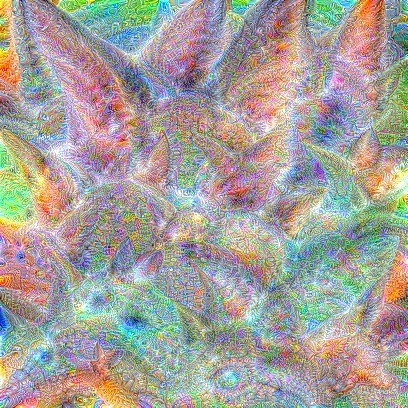

In [0]:
displayImage('convolutions.jpeg')

The pooling layers simply shrink the dimensions of the convolutional layer output. It typically does not shrink the channel containing the filters. Instead it shrinks the channels representing image height and width.

Various pooling operations are available. MaxPooling is a popular technique that splits the input data into chunks, and then chooses the max value in each chunk to represent that chunk. Thus, a 2x2 chunk can be reduced to 1 value.

An example of MaxPooling is shown below.

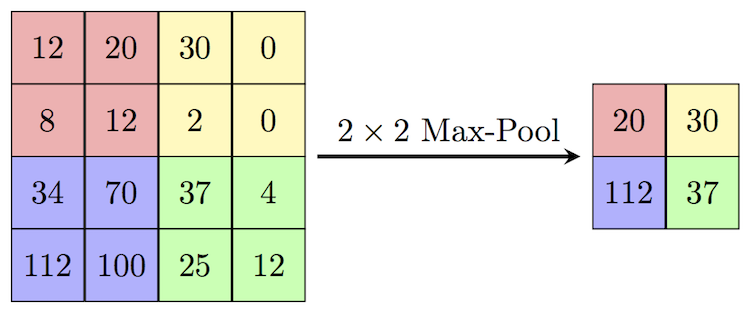

In [0]:
displayImage('Maxpool.png')

Example of building a CNN in Keras is shown below.

In [0]:
# Imports
import keras

# Build CNN
cnn = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                            activation='relu', input_shape=(28, 28, 1,)))
cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
cnn.add(keras.layers.Conv2D(64, (5, 5), activation='relu'))
cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(1000, activation='relu'))
cnn.add(keras.layers.Dense(5, activation='softmax'))

print('CNN Model successfully built!')

Using TensorFlow backend.






CNN Model successfully built!


## Compiling a Model

When compiling a model in Keras, you must specify the optimizer to use. Optimizers determine how a neural network is trained. 

For example, you could use simple Stochastic Gradient Descent. In SGD, a few samples are selected randomly from the whole data set and are considered a batch. These batches are ran through the neural network, to obtain their corresponding outputs. These outputs are compared with their respective target outputs to obtain a gradient to update the weights by to *hopefully* achieve better results.

Other optimizers such as RMSProp or Adam change the way the neural network adjusts its weights. This may improve performance on certain datasets, which can be tested through trial and error.

A learning rate must also be specified for the optimizer. Learning rate controls how much the weights are changed on each pass through backpropagation. Large learning rates may cause the weights to oscillate in finding minima during gradient descent, but small learning rates may cause the weights to adjust too slowly to find a meaningful answer in any reasonable timeframe.

Momentum may also be specified by the optimizer. Momentum can help the network avoid getting stuck in local minima in its goal of finding the global minima. There is no guarantee that this will help the network get out of all local minima, but effectiveness can be found through trial and error as well.


Another thing that must be specified when compiling the model in Keras is the loss function to be used. This loss function is what is going to be minimized during gradient descent when training the neural network.

One example of a loss function that is commonly used is mean squared error. The name is pretty self-explanatory: the average squared error produced when comparing the network outputs and target outputs is used during the gradient descent process.

An example of specifying an optimizer and compiling a CNN model in Keras is found below.

In [0]:
# Declare Keras optimizer using SGD
sgd_optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.0)

# Compile the CNN model using the sgd optimizer specified above
cnn.compile(optimizer=sgd_optimizer, 
            loss='mean_squared_error',
            metrics=['accuracy'])

print('Model successfully compiled!')


Model successfully compiled!


## Training a Model (CNN)

When training a model, the loss function provided is minimized (or attempted to be minimized) through backpropagation passes. Many things can go wrong during this training process including getting stuck in a local minima, underfitting, and overfitting.

Getting stuck in a local minima can happen when the learning rate is either too low or there is no momentum built into the optimizer. This is because gradient descent works by moving in the direction of minima. If a local minima is "deep" enough, the network can get stuck there and assume it is the absolute minima. Momentum helps to push the network out of these local minima and towards even bigger minima.

Underfitting can occur when the neural network is not powerful enough to describe a dataset. This will be noticeable if both the training and validation scores are very low.

An example of a greatly exaggerated underfitting model is shown below:

11493376/11490434 [==============================] - 2s 0us/step



Train on 60000 samples, validate on 10000 samples
Epoch 1/50





15/15 [==============================] - 5s 361ms/step - loss: 0.1884 - acc: 0.0504 - val_loss: 0.1891 - val_acc: 0.0474
Epoch 2/50
15/15 [==============================] - 1s 51ms/step - loss: 0.1872 - acc: 0.0565 - val_loss: 0.1880 - val_acc: 0.0530
Epoch 3/50
15/15 [==============================] - 1s 52ms/step - loss: 0.1858 - acc: 0.0630 - val_loss: 0.1869 - val_acc: 0.0583
Epoch 4/50
15/15 [==============================] - 1s 52ms/step - loss: 0.1848 - acc: 0.0682 - val_loss: 0.1857 - val_acc: 0.0641
Epoch 5/50
15/15 [==============================] - 1s 52ms/step - loss: 0.1838 - acc: 0.0733 - val_loss: 0.1848 - val_acc: 0.0680
Epoch 6/50
15/15 [==============================] - 1s 51ms/step - loss: 0.1829 - acc: 0.0778 - val_loss: 0.1839 - val_acc: 0.0734
Epoch 7/50
15/15 [==============================] - 1s 52ms/step - loss: 0.1820 - acc: 0.0

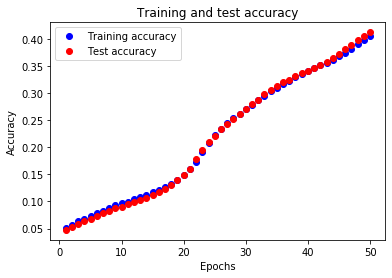

In [0]:
# Load MNIST dataset
from keras.datasets import mnist
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype(np.float32)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

# Create underfitting neural network (we will be using a simple FFN, not a CNN)
underfitting_model = keras.models.Sequential()
underfitting_model.add(keras.layers.Flatten(input_shape=(28, 28, 1,)))
underfitting_model.add(keras.layers.Dense(10, activation='softmax'))

underfitting_model.compile(optimizer='sgd', 
                           loss='mean_squared_error', 
                           metrics=['accuracy'])

# Fit the model to the mnist dataset
history = underfitting_model.fit(x_train, y_train, epochs=50,
                       validation_data=(x_test, y_test),
                       validation_steps=int(np.ceil(60000 / float(4096))),
                       steps_per_epoch=int(np.ceil(60000 / float(4096))))

# Plot training results
history_dict = history.history
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(range(1, 51), acc_values, 'bo', label='Training accuracy')
plt.plot(range(1, 51), test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Overfitting occurs when the network is too powerful that it can simply map each input to each output, resulting in a model that does not generalize well to data it has not seen before.

This will be noticeable if the training accuracy is much higher than the validation accuracy.

An example of a greatly exaggerated overfitting model is shown below:

57344/57026 [==============================] - 0s 6us/step
Train on 404 samples, validate on 102 samples
Epoch 1/75
6/6 [==============================] - 0s 30ms/step - loss: 374.8633 - mean_absolute_error: 14.2754 - val_loss: 81.9962 - val_mean_absolute_error: 6.8844
Epoch 2/75
6/6 [==============================] - 0s 4ms/step - loss: 75.9615 - mean_absolute_error: 6.5289 - val_loss: 100.5565 - val_mean_absolute_error: 8.2116
Epoch 3/75
6/6 [==============================] - 0s 4ms/step - loss: 155.0192 - mean_absolute_error: 10.2833 - val_loss: 121.9481 - val_mean_absolute_error: 9.2154
Epoch 4/75
6/6 [==============================] - 0s 4ms/step - loss: 96.9067 - mean_absolute_error: 7.6120 - val_loss: 100.5176 - val_mean_absolute_error: 8.2213
Epoch 5/75
6/6 [==============================] - 0s 5ms/step - loss: 125.7406 - mean_absolute_error: 9.0822 - val_loss: 138.2839 - val_mean_absolute_error: 9.9452
Epoch 6/75
6/6 [==============================] - 0s 4ms/step - loss: 109.6

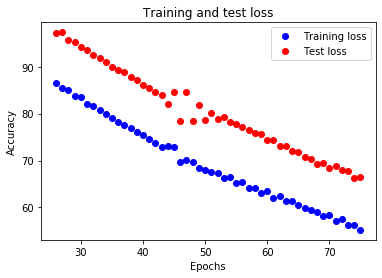

In [0]:
# Load MNIST dataset
from keras.datasets import boston_housing
from keras import metrics
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)
x_test = x_test.astype(np.float32)
y_test = y_test.astype(np.float32)
x_train = x_train[:]
y_train = y_train[:]

# Create underfitting neural network (we will be using a simple FFN, not a CNN)
overfitting_model = keras.models.Sequential()
overfitting_model.add(keras.layers.Dense(64, activation='relu', input_shape=(13,)))
overfitting_model.add(keras.layers.Dense(64, activation='relu'))
overfitting_model.add(keras.layers.Dense(1))

overfitting_model.compile(optimizer='rmsprop',
                           loss='mean_squared_error', 
                           metrics=['mae'])

# Fit the model to the mnist dataset
history = overfitting_model.fit(x_train, y_train, epochs=50+25,
                       validation_data=(x_test, y_test),
                       validation_steps=int(np.ceil(403 / float(50+25))),
                       steps_per_epoch=int(np.ceil(403 / float(50+25))))

# Plot training results
history_dict = history.history
acc_values = history_dict['loss']
test_acc_values = history_dict['val_loss']

plt.plot(range(1+25, 51+25), acc_values[25:], 'bo', label='Training loss')
plt.plot(range(1+25, 51+25), test_acc_values[25:], 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Finetuning a Pre-Trained Model

When trying to train a convolutional neural network, you may want to use the feature extraction (convolution) layers of a bigger network that has been trained by someone else. This works because the convolutional layers are simply extracting useful features that might generalize to other classifiers fairly well. You then replace the FFN classifier of the network with your own hand-made FFN classifier.

From there, you can choose to "freeze" the learned weights of the convolutional layers and only choose to learn the weights making up your attached FFN classifier. At the very least, you may consider freezing the feature extraction layers for a few epochs while the classifier "warms up" since initially the classifier will be completely incorrect, and gradient descent will cause the convolutional layers to adjust too much when they are already near-optimal.

In Keras, you can load other networks easily to use in finetuning.

In [0]:
from keras.applications import VGG16

baseModel = VGG16(weights='imagenet', include_top=False,
                  input_tensor=keras.layers.Input(shape=(224, 224, 3)))

print('Successfully loaded VGG16 model')

Successfully loaded VGG16 model


Creating the classifier in Keras is easy as well:

In [0]:
headModel = baseModel.output
headModel = keras.layers.Flatten(name="flatten")(headModel)
headModel = keras.layers.Dense(612, activation='relu')(headModel)
headModel = keras.layers.Dropout(0.5)(headModel)
headModel = keras.layers.Dense(5, activation='softmax')(headModel)

print('Successfully constructed classifier head')

Successfully constructed classifier head


Then, to combine the two in Keras:

In [0]:
model = keras.models.Model(inputs=baseModel.input, outputs=headModel)

print('Successfully merged CNN trunk and classifier head')

Successfully merged CNN trunk and classifier head


And if you would like to freeze the base model in Keras:

In [0]:
for layer in baseModel.layers:
  layer.trainable = False

print('Successfully froze CNN trunk layers')

Successfully froze CNN trunk layers


From there, you can simply pass in the training data and begin training. Since this takes a while with a pre-trained network, and this has been demonstrated in Homework 3, I will leave that example code in HW 3.